<a href="https://colab.research.google.com/github/vitorsorato/IMC/blob/main/Exercicio_ex06_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Digite o umidade: 0
Digite a temperatura: 0
0.5626633986928103


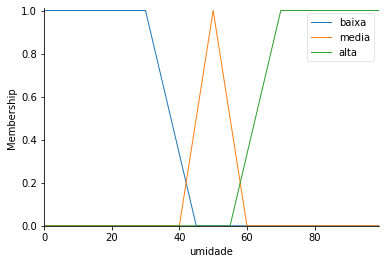

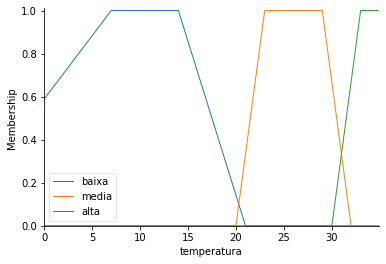

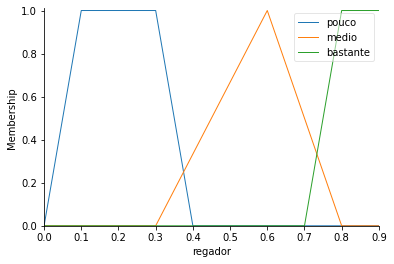

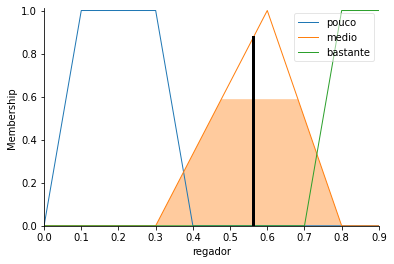

In [18]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

#ARTUR SALVADOR TISCOSKI
#VITOR SORATO BEZ FONTANA
#VINICIUS MEDEIROS RODRIGUES CHEDE

# Estufas possuem função de reter calor, proteger as plantas de possíveis pragas e também de protege-las de incidências solares. 
# A intensão desta estufa inteligente é automatizar alguns processos utilizando sistemas embarcados então caso o nível de água esteja baixo, 
# por exemplo, os sensores em conjunto com o sistema trabalhariam para estabilizar o ambiente a favor da necessidade dessas plantas. 
# O mesmo ocorre para a temperatura do ambiente.

#Primeira entrada: Umidade, aqui criamos o universo da umidade
umidade = ctrl.Antecedent(np.arange(0, 100, 1), 'umidade')

#Segunda entrada: Temperatura, aqui criamos o universo da temperatura
temperatura = ctrl.Antecedent(np.arange(0, 35, 0.1), 'temperatura')

#Saída
regador = ctrl.Consequent(np.arange(0, 1, .1), 'regador')

#Cria conjunto fuzzy da umidade
umidade['baixa'] = fuzz.trapmf(umidade.universe, [0, 0, 30, 45])
umidade['media'] = fuzz.trimf(umidade.universe, [40, 50, 60])
umidade['alta'] = fuzz.trapmf(umidade.universe, [55, 70, 100, 100])

#Cria função de função de pertinência
umidade.view()

#Cria conjunto fuzzy da temperatura
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [-10, 7, 14, 21])
temperatura['media'] = fuzz.trapmf(temperatura.universe, [20, 23, 29, 32])
temperatura['alta'] = fuzz.trapmf(temperatura.universe, [30, 33, 35, 35])

#Cria função de função de pertinência
temperatura.view()

#Cria conjunto fuzzy do regador
regador['pouco'] = fuzz.trapmf(regador.universe, [0, 0.1, 0.3, 0.35])
regador['medio'] = fuzz.trapmf(regador.universe, [0.3, 0.6, 0.6, 0.8])
regador['bastante'] = fuzz.trapmf(regador.universe, [0.7, 0.8, 1, 1])

#Cria função de função de pertinência
regador.view()

#Define as regras do sistema
regra1 = ctrl.Rule(umidade['baixa'] & temperatura['media'], regador['bastante'])
regra2 = ctrl.Rule(umidade['media'] & temperatura['alta'], regador['bastante'])
regra3 = ctrl.Rule(umidade['alta'] & temperatura['media'], regador['pouco'])
regra4 = ctrl.Rule(umidade['media'] & temperatura['media'], regador['medio'])
regra5 = ctrl.Rule(umidade['alta'] & temperatura['alta'], regador['medio'])
regra6 = ctrl.Rule(umidade['baixa'] & temperatura['baixa'], regador['medio'])
regra7 = ctrl.Rule(umidade['alta'] & temperatura['baixa'], regador['pouco'])
regra8 = ctrl.Rule(umidade['baixa'] & temperatura['alta'], regador['bastante'])
regra9 = ctrl.Rule(umidade['media'] & temperatura['baixa'], regador['medio'])

fuzzy_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
engine = ctrl.ControlSystemSimulation(fuzzy_ctrl)

umidade_entrada = float(input("Digite o umidade: "))
temperatura_entrada = float(input("Digite a temperatura: "))

engine.input['umidade'] = umidade_entrada
engine.input['temperatura'] = temperatura_entrada

engine.compute()

print(engine.output['regador'])
regador.view(sim=engine)
